<a href="https://colab.research.google.com/github/Edward1304/Signals-Theory-Edward/blob/main/SmmothWT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import pywt

import matplotlib.pyplot as plt  # data plotting
from matplotlib import rcParams

rcParams['figure.figsize']     = [15,9]
rcParams['lines.markersize']   = 12         # marker size in points
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['figure.dpi']     = 120

In [ ]:
def get_ave_values(xvalues, yvalues, n = 6):
    signal_length = len(xvalues)
    if signal_length % n == 0:
        padding_length = 0
    else:
        padding_length = n - signal_length//n % n
    xarr = np.array(xvalues)
    yarr = np.array(yvalues)
    xarr.resize(signal_length//n, n)
    yarr.resize(signal_length//n, n)
    xarr_reshaped = xarr.reshape((-1,n))
    yarr_reshaped = yarr.reshape((-1,n))
    x_ave = xarr_reshaped[:,0]
    y_ave = np.nanmean(yarr_reshaped, axis=1)
    return x_ave, y_ave

def plot_signal_plus_average(time, signal, average_over = 6):
    fig, ax = plt.subplots()
    time_ave, signal_ave = get_ave_values(time, signal, average_over)
    ax.plot(time, signal, label='signal')
    ax.plot(time_ave, signal_ave, label = 'time average (n={})'.format(6))
    ax.set_xlim([time[0], time[-1]])
    ax.set_ylabel('Signal Amplitude')
    ax.set_title('Signal + Time Average')
    ax.set_xlabel('Time')
    ax.legend()
    plt.show()

def get_fft_values(y_values, T, N, f_s):
    f_values = np.linspace(0.0, 1.0/(2.0*T), N//2)
    fft_values_ = fft(y_values)
    fft_values = 2.0/N * np.abs(fft_values_[0:N//2])
    return f_values, fft_values

In [ ]:
dataset = "http://paos.colorado.edu/research/wavelets/wave_idl/sst_nino3.dat"
df_nino = pd.read_table(dataset)
N  = df_nino.shape[0]
t0 = 1871
dt = 0.25
time = np.arange(0, N) * dt + t0
signal = df_nino.values.squeeze()

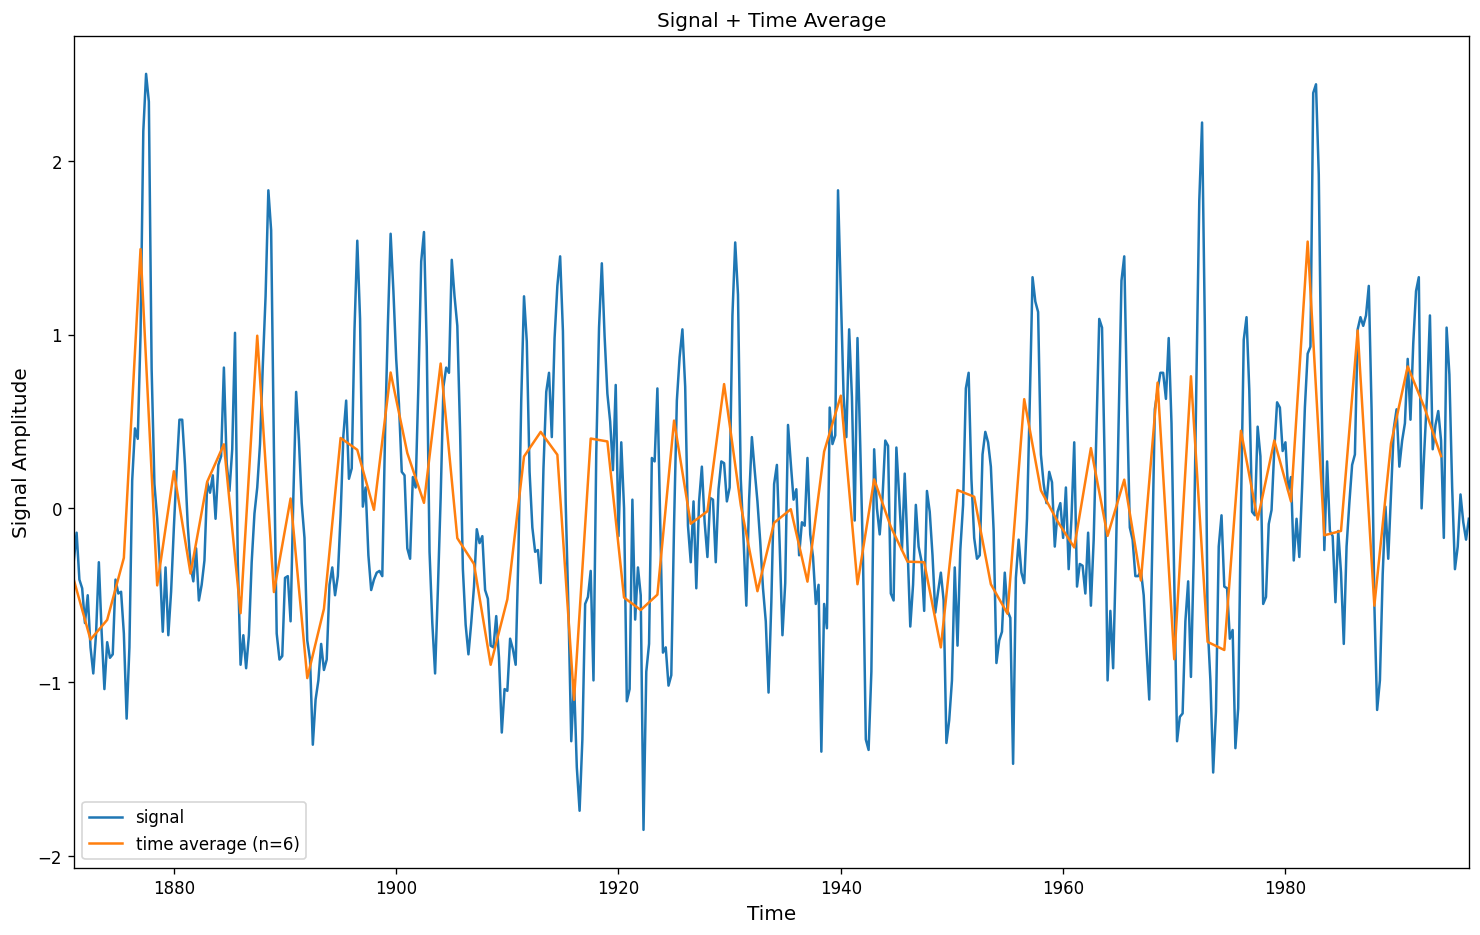

In [ ]:
scales = np.arange(100, 120)
plot_signal_plus_average(time, signal)